In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt

### **Po Shen Loh method**


In [ ]:
def metodoPOSHENLOH(B, C):
  B = -B
  M = B/2
  if(0 <= M**2 - C):
    U = math.sqrt(M**2 - C)
    x1 = M + U
    x2 = M - U
  else:
    U = math.sqrt(-(M**2 - C))
    x1 = complex(M, U)
    x2 = complex(M, -U)
  if(x1 == x2):
    return x1
  else:
    return (x1, x2)

### **Classical method**

In [ ]:
def classicalmethod(B, C):
  if(0 <= B**2 - 4*C):
    x1 = (-B/2) + (math.sqrt(B**2 - 4*C)/2)
    x2 = (-B/2) - (math.sqrt(B**2 - 4*C)/2)
  else:
    i = math.sqrt(-(B**2 - 4*C))/2
    x1 = complex(-B/2, i)
    x2 = complex(-B/2, -i)
  if(x1 == x2):
    return x1
  else:
    return (x1, x2)

### **1.**

Text(0, 0.5, 'f(x)')

/usr/local/lib/python3.6/dist-packages/google/colab/_event_manager.py:28: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.
  func(*args, **kwargs)


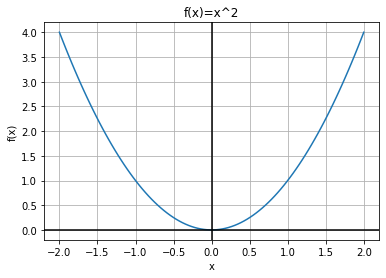

In [ ]:
#x^2
def f(x):
  return x**2

x = np.linspace(-2.0,2.0,100)
fig, ax = plt.subplots()
ax.plot(x,f(x))
ax.axhline(y=0, color='K')
ax.axvline(x=0, color='k')
ax.grid(True, which='both')
plt.title('f(x)=x^2')
plt.xlabel('x')
plt.ylabel('f(x)')

Text(0, 0.5, 'g(x)')

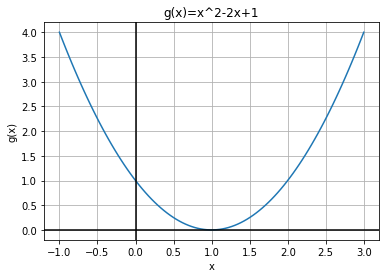

In [ ]:
#x^2 - 2x + 1
def g(x):
  return x**2 - 2*x + 1

x = np.linspace(-1.0,3.0,100)
fig, ax = plt.subplots()
ax.plot(x,g(x))
ax.axhline(y=0, color='K')
ax.axvline(x=0, color='k')
ax.grid(True, which='both')
plt.title('g(x)=x^2-2x+1')
plt.xlabel('x')
plt.ylabel('g(x)')

Text(0, 0.5, 'h(x)')

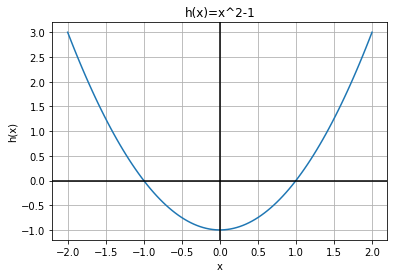

In [ ]:
#x^2 - 1
def h(x):
  return x**2 - 1

x = np.linspace(-2.0,2.0,100)
fig, ax = plt.subplots()
ax.plot(x,h(x))
ax.axhline(y=0, color='K')
ax.axvline(x=0, color='k')
ax.grid(True, which='both')
plt.title('h(x)=x^2-1')
plt.xlabel('x')
plt.ylabel('h(x)')

Text(0, 0.5, 'k(x)')

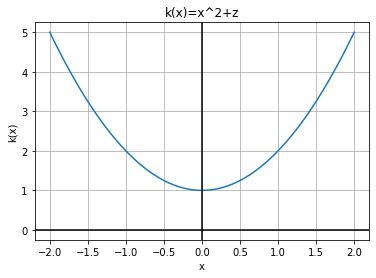

In [ ]:
#x^2 + 1
def k(x):
  return x**2 + 1

x = np.linspace(-2.0,2.0,100)
fig, ax = plt.subplots()
ax.plot(x,k(x))
ax.axhline(y=0, color='K')
ax.axvline(x=0, color='k')
ax.grid(True, which='both')
plt.title('k(x)=x^2+z')
plt.xlabel('x')
plt.ylabel('k(x)')

### **2.**

In [ ]:
#x^2
print("Roots")
print("Po Shen Loh method: " , metodoPOSHENLOH(0,0))
print("Classical method: " , classicalmethod(0,0))

Roots
Po Shen Loh method:  0.0
Classical method:  0.0


In [ ]:
#x^2 - 2x + 1
print("Root")
print("Po Shen Loh method: " , metodoPOSHENLOH(-2,1))
print("Classical method: " , classicalmethod(-2,1))

Root
Po Shen Loh method:  1.0
Classical method:  1.0


In [ ]:
#x^2 - 1
print("Roots")
print("Po Shen Loh method: " , metodoPOSHENLOH(0,-1))
print("Classical method: " , classicalmethod(0,-1))

Roots
Po Shen Loh method:  (1.0, -1.0)
Classical method:  (1.0, -1.0)


In [ ]:
#x^2 + 1
print("Roots")
print("Po Shen Loh method: " , metodoPOSHENLOH(0,1))
print("Classical method: " , classicalmethod(0,1))

Roots
Po Shen Loh method:  (1j, -1j)
Classical method:  (1j, -1j)


### **3.**

In [ ]:
#x^2
def f1(z):
    return z ** 2

def df1(z):
    return 2 * z

def newton_set1(z_c_r=0, z_c_i=0, zh = 5, zw=5, width=500, height=500, zoom=1,  niter=256):
    """ Fractals using newton-raphson """

    # Arreglo de pixeles
    # Crea un arreglo con todos los numeros hasta width*height*3, de tipo uint32, luego lo convierte en una matriz 3d
    pixels = np.arange(width*height*3, dtype=np.uint32).reshape(height, width, 3)

    eps = 2 # máximo error permitido

    # Estas son las raices permitidas para colorear
    r1 = 0

    # Factor de multiplicacion de color
    # NOTE: Cada vez que se incrementa, el color se oscurece
    multcol = 5

    for y in range(height):
            #Parte imaginaria
            zy =   z_c_i+(((y-(height/2))/height)*zh*zoom)

            for x in range(width):
                #Parte real
                zx = z_c_r+ (((x-(width/2))/width)*zw*zoom)

                # Mapping real -> complex plane
                z = complex(zx, zy)
                
                count = 0
                

                #Este for da un numero z lo suficientemente cerca de la raiz
                for i in range(niter):
                    # complex numerical derivative
                    dz = df1(z)
                    if dz == 0:
                        break

                    count += 1
                    if count > 255:
                        break
                   
                    znext = z - (f1(z) / dz) # Newton iteration

                    if abs(znext - z) < eps: # Si la diferencia entre el z anterior y el actual es menor que eps, ya se aporximó lo suficiente a la raiz
                        break
                    
                    z = znext


                # Pixels colored using the roots
                if abs(z-r1)<=eps:
                    # color red
                    pixels[height-y-1,x] = (255 - count*multcol, 0, 0) #Al pixel en esa posición se le asigna una intensidad de rojo
                else:   
                   pixels[height-y-1,x] = (0, 0, 0)
               
    return pixels

def display1(z_c_r=0, z_c_i=0, zh = 1, zw=1, width=500, height=500, zoom=20,  niter=256000):
    """ Display a newton-raphson fractal """
    print("Z region from (",z_c_r+ (((0-(width/2))/width)*zw*zoom),",",z_c_i+(((0-(height/2))/height)*zh*zoom) ,") to (",z_c_r+ (((width-(width/2))/width)*zw*zoom),",",z_c_i+(((height-(height/2))/height)*zh*zoom),")")
    pimg = newton_set1(z_c_r=z_c_r, z_c_i=z_c_i, zh = zh, zw=zw, width=width, height=width, zoom=zoom,  niter=niter)
    plt.title('Newton Fractal f(x)=Z^2')
    plt.xlabel("real"+"("+ str(z_c_r+ (((0-(width/2))/width)*zw*zoom))+","+str(z_c_r+ (((width-(width/2))/width)*zw*zoom))+")")
    plt.ylabel("imaginary"+"("+str(z_c_i+(((0-(height/2))/height)*zh*zoom))+","+str(z_c_i+(((height-(height/2))/height)*zh*zoom)) +")")
    plt.imshow(pimg)
    plt.show()

Z region from ( -5.0 , -5.0 ) to ( 5.0 , 5.0 )


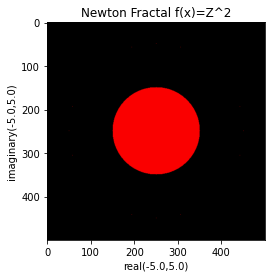

In [ ]:
display1(zoom=10)

All points, with exception of 0+0j, converge to unique root 0, but they do with different speeds.
0+0j is the only point that does not do, because is the center of the circle, and that do impossible to divide for a derivative that is 0.

In [ ]:
#x^2 - 2x + 1
def f2(z):
    return z**2 - 2*z + 1

def df2(z):
    return 2*z - 2

def newton_set2(z_c_r=0, z_c_i=0, zh = 5, zw=5, width=500, height=500, zoom=1,  niter=256):
    """ Fractals using newton-raphson """

    # Arreglo de pixeles
    # Crea un arreglo con todos los numeros hasta width*height*3, de tipo uint32, luego lo convierte en una matriz 3d
    pixels = np.arange(width*height*3, dtype=np.uint32).reshape(height, width, 3)

    eps = 2 # máximo error permitido

    # Estas son las raices permitidas para colorear
    r1 = 1

    # Factor de multiplicacion de color
    # NOTE: Cada vez que se incrementa, el color se oscurece
    multcol = 5

    for y in range(height):
            #Parte imaginaria
            zy =   z_c_i+(((y-(height/2))/height)*zh*zoom)

            for x in range(width):
                #Parte real
                zx = z_c_r+ (((x-(width/2))/width)*zw*zoom)

                # Mapping real -> complex plane
                z = complex(zx, zy)
                
                count = 0
                

                #Este for da un numero z lo suficientemente cerca de la raiz
                for i in range(niter):
                    # complex numerical derivative
                    dz = df2(z)
                    if dz == 0:
                        break

                    count += 1
                    if count > 255:
                        break
                   
                    znext = z - (f2(z) / dz) # Newton iteration

                    if abs(znext - z) < eps: # Si la diferencia entre el z anterior y el actual es menor que eps, ya se aporximó lo suficiente a la raiz
                        break
                    
                    z = znext


                # Pixels colored using the roots
                if abs(z-r1)<=eps:
                    # color red
                    pixels[height-y-1,x] = (255 - count*multcol, 0, 0) #Al pixel en esa posición se le asigna una intensidad de rojo
                else:   
                   pixels[height-y-1,x] = (0, 0, 0)
               
    return pixels

def display2(z_c_r=0, z_c_i=0, zh = 1, zw=1, width=500, height=500, zoom=20,  niter=256000):
    """ Display a newton-raphson fractal """
    print("Z region from (",z_c_r+ (((0-(width/2))/width)*zw*zoom),",",z_c_i+(((0-(height/2))/height)*zh*zoom) ,") to (",z_c_r+ (((width-(width/2))/width)*zw*zoom),",",z_c_i+(((height-(height/2))/height)*zh*zoom),")")
    pimg = newton_set2(z_c_r=z_c_r, z_c_i=z_c_i, zh = zh, zw=zw, width=width, height=width, zoom=zoom,  niter=niter)
    plt.title('Newton Fractal f(x)=Z^2-2z+1')
    plt.xlabel("real"+"("+ str(z_c_r+ (((0-(width/2))/width)*zw*zoom))+","+str(z_c_r+ (((width-(width/2))/width)*zw*zoom))+")")
    plt.ylabel("imaginary"+"("+str(z_c_i+(((0-(height/2))/height)*zh*zoom))+","+str(z_c_i+(((height-(height/2))/height)*zh*zoom)) +")")
    plt.imshow(pimg)
    plt.show()

Z region from ( -5.0 , -5.0 ) to ( 5.0 , 5.0 )


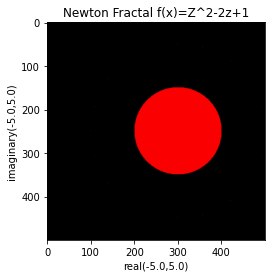

In [ ]:
display2(zoom=10)

All points, with exception of 1+0j, converge to unique root 1, but they do with different speeds. 1+0j is the only point that does not do, because is the center of the circle, and that do impossible to divide for a derivative that is 0.

In [ ]:
#x^2 - 1
def f3(z):
    return z**2 - 1

def df3(z):
    return 2*z

def newton_set3(z_c_r=0, z_c_i=0, zh = 5, zw=5, width=500, height=500, zoom=1,  niter=256):
    """ Fractals using newton-raphson """

    # Arreglo de pixeles
    # Crea un arreglo con todos los numeros hasta width*height*3, de tipo uint32, luego lo convierte en una matriz 3d
    pixels = np.arange(width*height*3, dtype=np.uint32).reshape(height, width, 3)

    eps = 1e-3 # máximo error permitido

    # Estas son las raices permitidas para colorear
    r1 = 1
    r2 = -1

    # Factor de multiplicacion de color
    # NOTE: Cada vez que se incrementa, el color se oscurece
    multcol = 5

    for y in range(height):
            #Parte imaginaria
            zy =   z_c_i+(((y-(height/2))/height)*zh*zoom)

            for x in range(width):
                #Parte real
                zx = z_c_r+ (((x-(width/2))/width)*zw*zoom)

                # Mapping real -> complex plane
                z = complex(zx, zy)
                
                count = 0
                

                #Este for da un numero z lo suficientemente cerca de la raiz
                for i in range(niter):
                    # complex numerical derivative
                    dz = df3(z)
                    if dz == 0:
                        break

                    count += 1
                    if count > 255:
                        break
                   
                    znext = z - (f3(z) / dz) # Newton iteration

                    if abs(znext - z) < eps: # Si la diferencia entre el z anterior y el actual es menor que eps, ya se aporximó lo suficiente a la raiz
                        break
                    
                    z = znext


                # Pixels colored using the roots
                if abs(z-r1)<=eps:
                    # color red
                    pixels[height-y-1,x] = (255 - count*multcol, 0, 0) #Al pixel en esa posición se le asigna una intensidad de rojo
                elif abs(z-r2)<=eps:
                    pixels[height-y-1,x] = (0, 255 - count*multcol, 0)
                else:   
                   pixels[height-y-1,x] = (0, 0, 0)
               
    return pixels

def display3(z_c_r=0, z_c_i=0, zh = 1, zw=1, width=500, height=500, zoom=20,  niter=256):
    """ Display a newton-raphson fractal """
    print("Z region from (",z_c_r+ (((0-(width/2))/width)*zw*zoom),",",z_c_i+(((0-(height/2))/height)*zh*zoom) ,") to (",z_c_r+ (((width-(width/2))/width)*zw*zoom),",",z_c_i+(((height-(height/2))/height)*zh*zoom),")")
    pimg = newton_set3(z_c_r=z_c_r, z_c_i=z_c_i, zh = zh, zw=zw, width=width, height=width, zoom=zoom,  niter=niter)
    plt.title('Newton Fractal f(x)=Z^2-1')
    plt.xlabel("real"+"("+ str(z_c_r+ (((0-(width/2))/width)*zw*zoom))+","+str(z_c_r+ (((width-(width/2))/width)*zw*zoom))+")")
    plt.ylabel("imaginary"+"("+str(z_c_i+(((0-(height/2))/height)*zh*zoom))+","+str(z_c_i+(((height-(height/2))/height)*zh*zoom)) +")")
    plt.imshow(pimg)
    plt.show()

Z region from ( -5.0 , -5.0 ) to ( 5.0 , 5.0 )


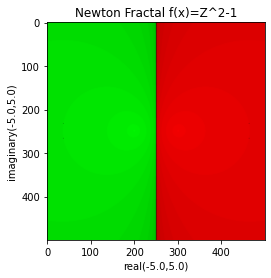

In [ ]:
display3(zoom=10)

The left side, all numbers less than 0+xj, converges to -1, and the right side, all numbers greater than 0+xj, converges to 1.
The vertical axis of 0 does not converge to any root because its derivate is 0.

In [ ]:
#x^2 + 1
def f4(z):
    return z**2 + 1

def df4(z):
    return 2*z

def newton_set4(z_c_r=0, z_c_i=0, zh = 5, zw=5, width=500, height=500, zoom=1,  niter=256):
    """ Fractals using newton-raphson """

    # Arreglo de pixeles
    # Crea un arreglo con todos los numeros hasta width*height*3, de tipo uint32, luego lo convierte en una matriz 3d
    pixels = np.arange(width*height*3, dtype=np.uint32).reshape(height, width, 3)

    eps = 1e-3 # máximo error permitido

    # Estas son las raices permitidas para colorear
    r1 = 1j
    r2 = -1j

    # Factor de multiplicacion de color
    # NOTE: Cada vez que se incrementa, el color se oscurece
    multcol = 5

    for y in range(height):
            #Parte imaginaria
            zy =   z_c_i+(((y-(height/2))/height)*zh*zoom)

            for x in range(width):
                #Parte real
                zx = z_c_r+ (((x-(width/2))/width)*zw*zoom)

                # Mapping real -> complex plane
                z = complex(zx, zy)
                
                count = 0
                

                #Este for da un numero z lo suficientemente cerca de la raiz
                for i in range(niter):
                    # complex numerical derivative
                    dz = df4(z)
                    if dz == 0:
                        break

                    count += 1
                    if count > 255:
                        break
                   
                    znext = z - (f4(z) / dz) # Newton iteration

                    if abs(znext - z) < eps: # Si la diferencia entre el z anterior y el actual es menor que eps, ya se aporximó lo suficiente a la raiz
                        break
                    
                    z = znext


                # Pixels colored using the roots
                if abs(z-r1)<=eps:
                    # color red
                    pixels[height-y-1,x] = (255 - count*multcol, 0, 0) #Al pixel en esa posición se le asigna una intensidad de rojo
                elif abs(z-r2)<=eps:
                    pixels[height-y-1,x] = (0, 255 - count*multcol, 0)
                else:   
                   pixels[height-y-1,x] = (0, 0, 0)
               
    return pixels

def display4(z_c_r=0, z_c_i=0, zh = 1, zw=1, width=500, height=500, zoom=20,  niter=256):
    """ Display a newton-raphson fractal """
    print("Z region from (",z_c_r+ (((0-(width/2))/width)*zw*zoom),",",z_c_i+(((0-(height/2))/height)*zh*zoom) ,") to (",z_c_r+ (((width-(width/2))/width)*zw*zoom),",",z_c_i+(((height-(height/2))/height)*zh*zoom),")")
    pimg = newton_set4(z_c_r=z_c_r, z_c_i=z_c_i, zh = zh, zw=zw, width=width, height=width, zoom=zoom,  niter=niter)
    plt.title('Newton Fractal f(x)=Z^2+1')
    plt.xlabel("real"+"("+ str(z_c_r+ (((0-(width/2))/width)*zw*zoom))+","+str(z_c_r+ (((width-(width/2))/width)*zw*zoom))+")")
    plt.ylabel("imaginary"+"("+str(z_c_i+(((0-(height/2))/height)*zh*zoom))+","+str(z_c_i+(((height-(height/2))/height)*zh*zoom)) +")")
    plt.imshow(pimg)
    plt.show()

Z region from ( -5.0 , -5.0 ) to ( 5.0 , 5.0 )


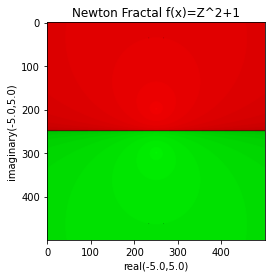

In [ ]:
display4(zoom=10)

The bot side, all numbers less than x+0j, converges to -1, and the top side, all numbers greater than x+0j, converges to 1. The horizontal axis of 0j does not converge to any root because its derivate is 0.

## **4.**

### **z^2**

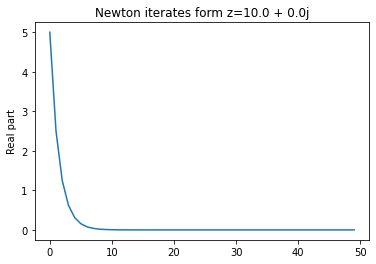

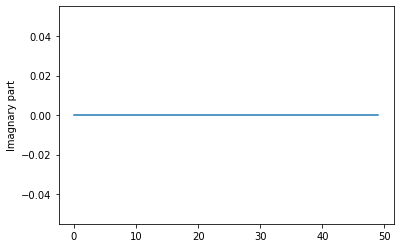

In [ ]:
def f5(z):
  return z**2

def df5(z):
  return 2*z

z=10.0 + 0.0j
r=[]
i=[]
for k in range(50):
  dz = df5(z)
  z = z - f5(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=10.0 + 0.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imagnary part')
plt.show()

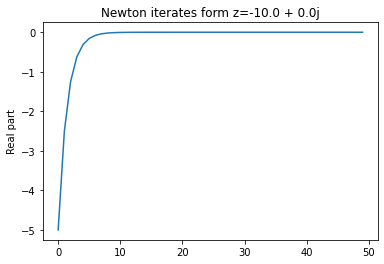

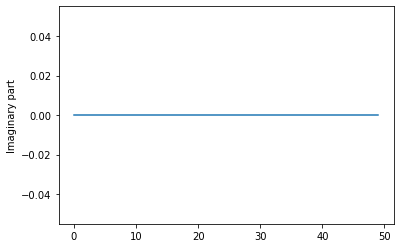

In [ ]:
def f5(z):
  return z**2

def df5(z):
  return 2*z

z=-10.0 + 0.0j
r=[]
i=[]
for k in range(50):
  dz = df5(z)
  z = z - f5(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=-10.0 + 0.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

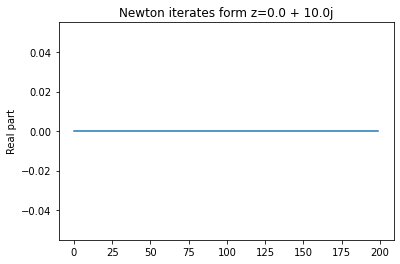

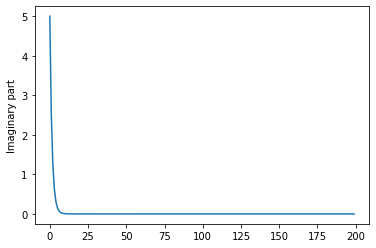

In [ ]:
def f5(z):
  return z**2

def df5(z):
  return 2*z

z=-0.0 + 10.0j
r=[]
i=[]
for k in range(200):
  dz = df5(z)
  z = z - f5(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=0.0 + 10.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

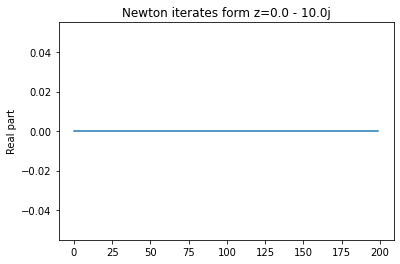

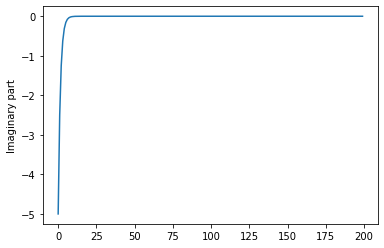

In [ ]:
def f5(z):
  return z**2

def df5(z):
  return 2*z

z=-0.0 - 10.0j
r=[]
i=[]
for k in range(200):
  dz = df5(z)
  z = z - f5(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=0.0 - 10.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

Interpretation:
The unique root to which the inputs can converge is 0

### **x^2 - 2x + 1**

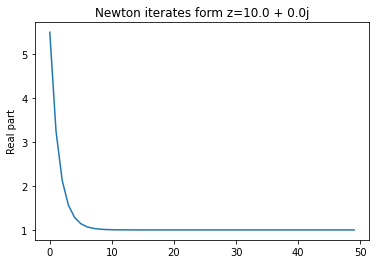

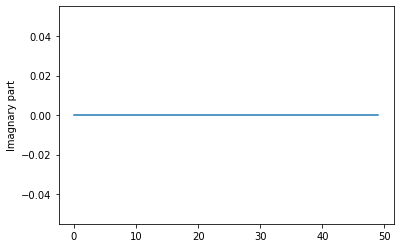

In [ ]:
def f6(z):
  return z**2 - 2*z + 1

def df6(z):
  return 2*z - 2

z=10.0 + 0.0j
r=[]
i=[]
for k in range(50):
  dz = df6(z)
  z = z - f6(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=10.0 + 0.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imagnary part')
plt.show()

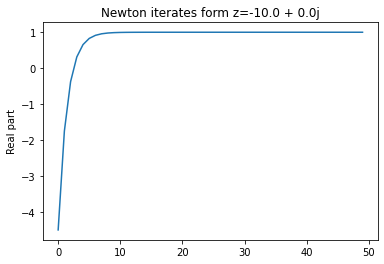

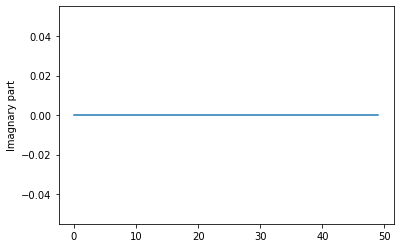

In [ ]:
def f6(z):
  return z**2 - 2*z + 1

def df6(z):
  return 2*z - 2

z=-10.0 + 0.0j
r=[]
i=[]
for k in range(50):
  dz = df6(z)
  z = z - f6(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=-10.0 + 0.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imagnary part')
plt.show()

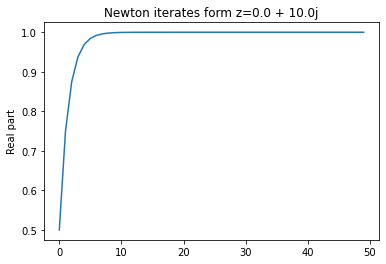

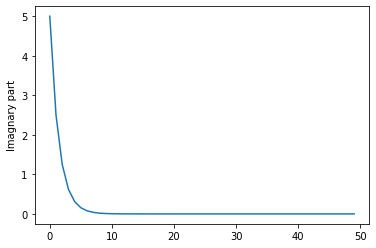

In [ ]:
def f6(z):
  return z**2 - 2*z + 1

def df6(z):
  return 2*z - 2

z=0.0 + 10.0j
r=[]
i=[]
for k in range(50):
  dz = df6(z)
  z = z - f6(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=0.0 + 10.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imagnary part')
plt.show()

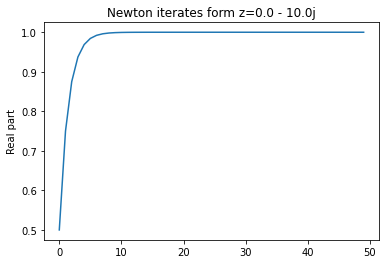

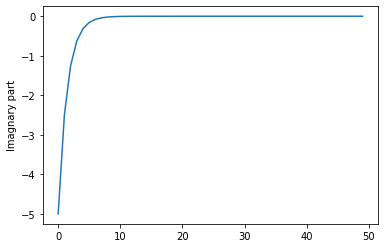

In [ ]:
def f6(z):
  return z**2 - 2*z + 1

def df6(z):
  return 2*z - 2

z=0.0 - 10.0j
r=[]
i=[]
for k in range(50):
  dz = df6(z)
  z = z - f6(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=0.0 - 10.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imagnary part')
plt.show()

Interpretation: The only root to which the inputs can converge is 1

### **z^2 – 1**

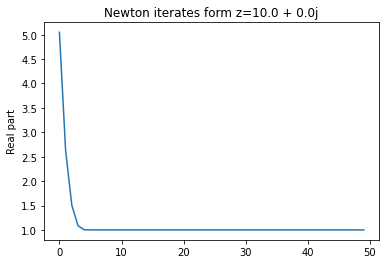

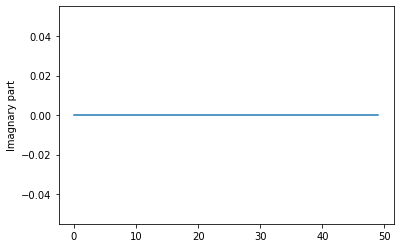

In [ ]:
def f7(z):
  return z**2 - 1

def df7(z):
  return 2*z

z=10.0 + 0.0j
r=[]
i=[]
for k in range(50):
  dz = df7(z)
  z = z - f7(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=10.0 + 0.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imagnary part')
plt.show()

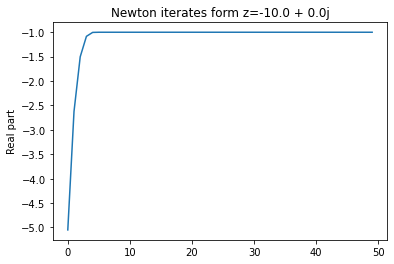

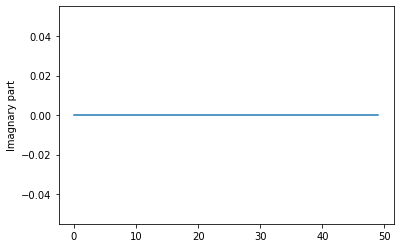

In [ ]:
def f7(z):
  return z**2 - 1

def df7(z):
  return 2*z

z=-10.0 + 0.0j
r=[]
i=[]
for k in range(50):
  dz = df7(z)
  z = z - f7(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=-10.0 + 0.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imagnary part')
plt.show()

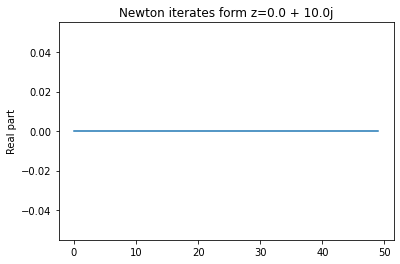

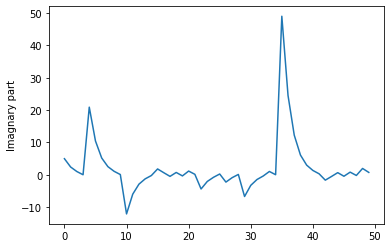

In [ ]:
def f7(z):
  return z**2 - 1

def df7(z):
  return 2*z

z=0.0 + 10.0j
r=[]
i=[]
for k in range(50):
  dz = df7(z)
  z = z - f7(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=0.0 + 10.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imagnary part')
plt.show()

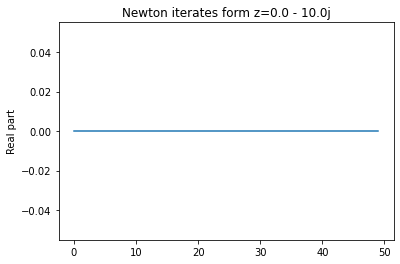

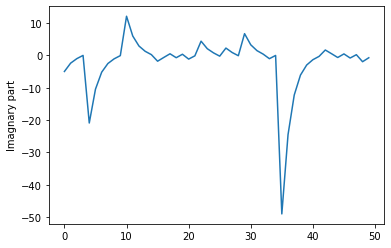

In [ ]:
def f7(z):
  return z**2 - 1

def df7(z):
  return 2*z

z=0.0 - 10.0j
r=[]
i=[]
for k in range(50):
  dz = df7(z)
  z = z - f7(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=0.0 - 10.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imagnary part')
plt.show()

Interpretation: The results correspond to the graph made previously, 10 is on the right side of the graph and -10 on the left side.
Also, the imaginary axle is found on the limit between red and green zone, so that, none only imaginary number can to converge.

### **z^2+ 1**

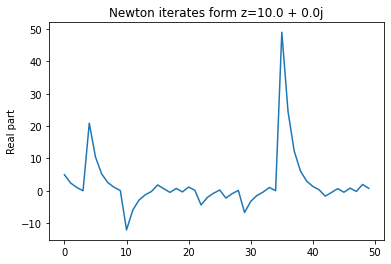

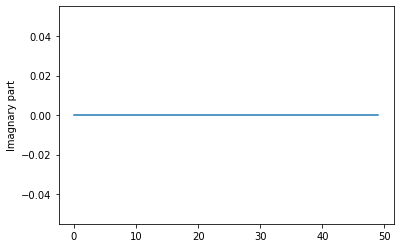

In [ ]:
def f8(z):
  return z**2 + 1

def df8(z):
  return 2*z

z=10.0 + 0.0j
r=[]
i=[]
for k in range(50):
  dz = df8(z)
  z = z - f8(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=10.0 + 0.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imagnary part')
plt.show()

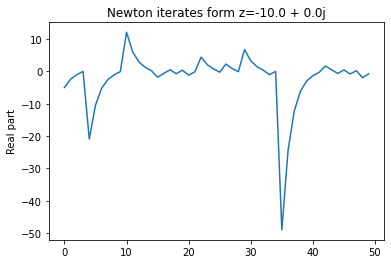

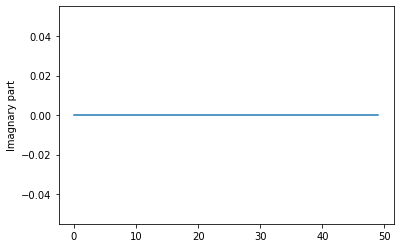

In [ ]:
def f8(z):
  return z**2 + 1

def df8(z):
  return 2*z

z=-10.0 + 0.0j
r=[]
i=[]
for k in range(50):
  dz = df8(z)
  z = z - f8(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=-10.0 + 0.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imagnary part')
plt.show()

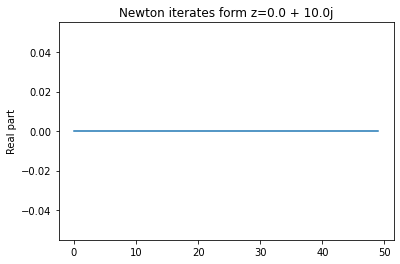

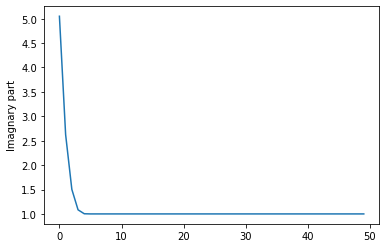

In [ ]:
def f8(z):
  return z**2 + 1

def df8(z):
  return 2*z

z=0.0 + 10.0j
r=[]
i=[]
for k in range(50):
  dz = df8(z)
  z = z - f8(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=0.0 + 10.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imagnary part')
plt.show()

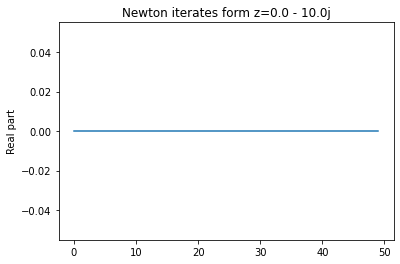

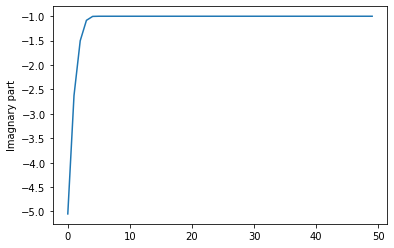

In [ ]:
def f8(z):
  return z**2 + 1

def df8(z):
  return 2*z

z=0.0 - 10.0j
r=[]
i=[]
for k in range(50):
  dz = df8(z)
  z = z - f8(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=0.0 - 10.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imagnary part')
plt.show()

Interpretation: The results correspond to the graph made previously, 10j is on the up side of the graph and -10 on the down side. Also, the real axle is found on the limit between red and green zone, so that, none only real number can to converge.

## **5.**

### **z^2**

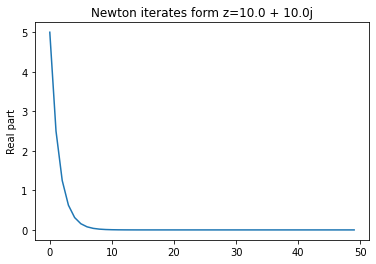

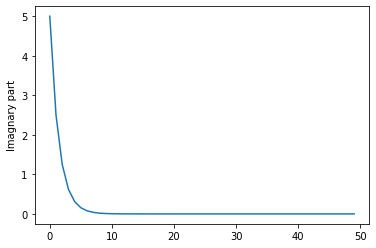

In [ ]:
def f9(z):
  return z**2

def df9(z):
  return 2*z

z=10.0 + 10.0j
r=[]
i=[]
for k in range(50):
  dz = df9(z)
  z = z - f9(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=10.0 + 10.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imagnary part')
plt.show()

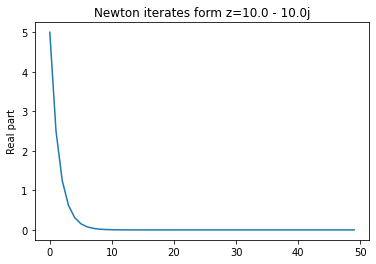

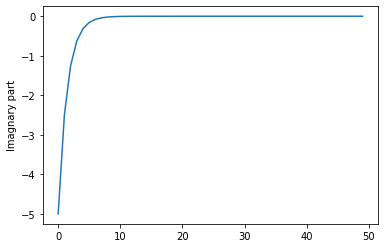

In [ ]:
def f9(z):
  return z**2

def df9(z):
  return 2*z

z=10.0 - 10.0j
r=[]
i=[]
for k in range(50):
  dz = df9(z)
  z = z - f9(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=10.0 - 10.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imagnary part')
plt.show()

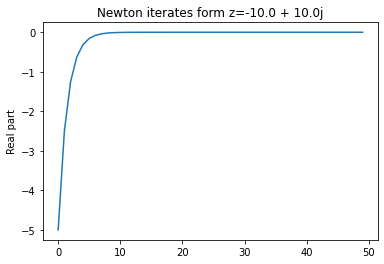

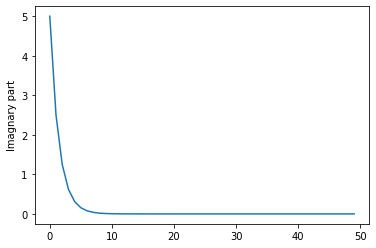

In [ ]:
def f9(z):
  return z**2

def df9(z):
  return 2*z

z=-10.0 + 10.0j
r=[]
i=[]
for k in range(50):
  dz = df9(z)
  z = z - f9(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=-10.0 + 10.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imagnary part')
plt.show()

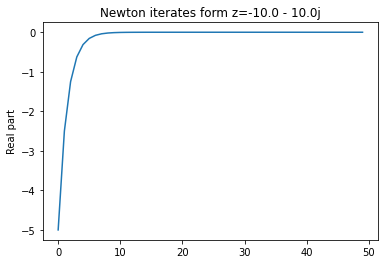

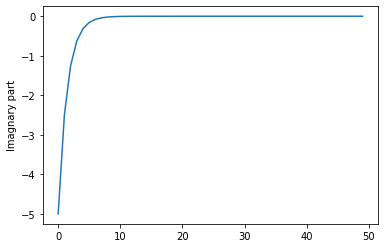

In [ ]:
def f9(z):
  return z**2

def df9(z):
  return 2*z

z=-10.0 - 10.0j
r=[]
i=[]
for k in range(50):
  dz = df9(z)
  z = z - f9(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=-10.0 - 10.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imagnary part')
plt.show()

In [ ]:
def f9(z):
  return z**2

def df9(z):
  return 2*z

z=0.0 - 0.0j
r=[]
i=[]
for k in range(50):
  dz = df9(z)
  z = z - f9(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=0.0 - 0.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imagnary part')
plt.show()

ZeroDivisionError: ignored

Interpretation: The unique root to which the inputs can converge is 0, also, the origin within the complex plane is the center of the drawn circle, the derivative is zero at this point and cannot be used for the Newton-Rhapson method.

### **x^2 - 2x + 1**

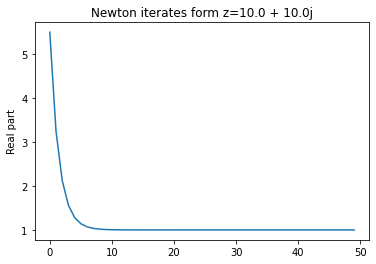

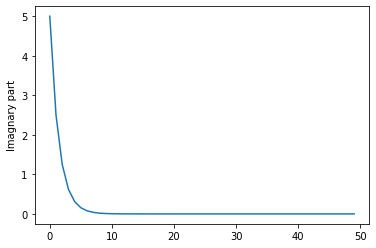

In [ ]:
def f10(z):
  return z**2 - 2*z + 1

def df10(z):
  return 2*z - 2

z=10.0 + 10.0j
r=[]
i=[]
for k in range(50):
  dz = df10(z)
  z = z - f10(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=10.0 + 10.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imagnary part')
plt.show()

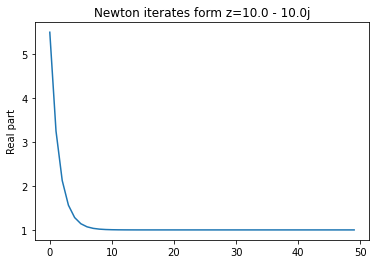

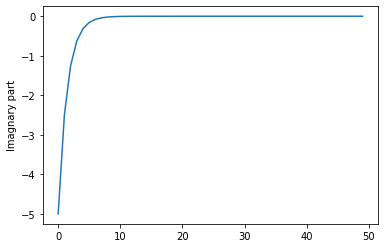

In [ ]:
def f10(z):
  return z**2 - 2*z + 1

def df10(z):
  return 2*z - 2

z=10.0 - 10.0j
r=[]
i=[]
for k in range(50):
  dz = df10(z)
  z = z - f10(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=10.0 - 10.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imagnary part')
plt.show()

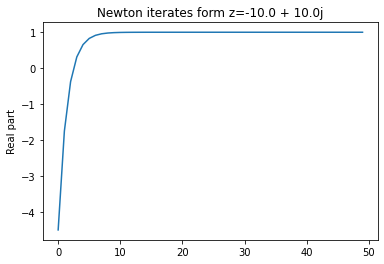

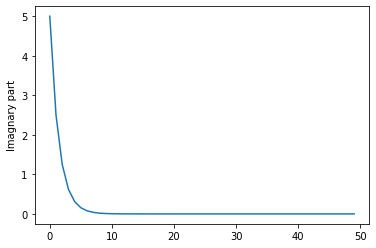

In [ ]:
def f10(z):
  return z**2 - 2*z + 1

def df10(z):
  return 2*z - 2

z=-10.0 + 10.0j
r=[]
i=[]
for k in range(50):
  dz = df10(z)
  z = z - f10(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=-10.0 + 10.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imagnary part')
plt.show()

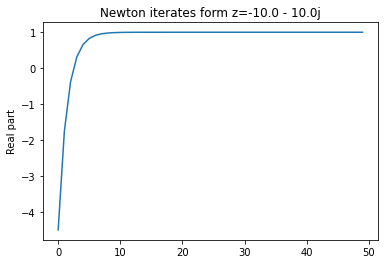

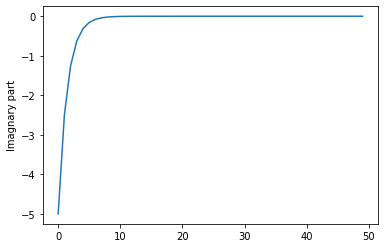

In [ ]:
def f10(z):
  return z**2 - 2*z + 1

def df10(z):
  return 2*z - 2

z=-10.0 - 10.0j
r=[]
i=[]
for k in range(50):
  dz = df10(z)
  z = z - f10(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=-10.0 - 10.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imagnary part')
plt.show()

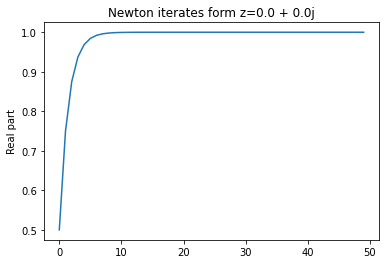

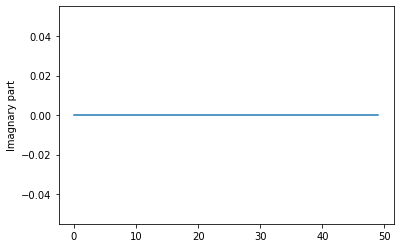

In [ ]:
def f10(z):
  return z**2 - 2*z + 1

def df10(z):
  return 2*z - 2

z=0.0 + 0.0j
r=[]
i=[]
for k in range(50):
  dz = df10(z)
  z = z - f10(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=0.0 + 0.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imagnary part')
plt.show()

Interpretation: The unique root to which the inputs can converge is 1, also, the circle center is not the origin of the complex plane, therefore, point 0+0j does not conflict.

### **z^2 – 1**

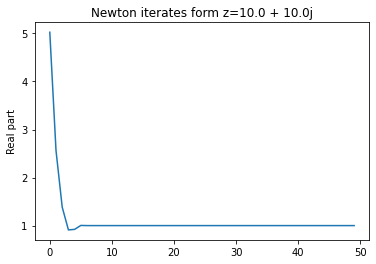

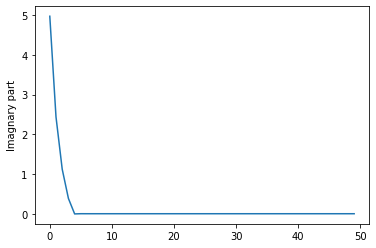

In [ ]:
def f11(z):
  return z**2 - 1

def df11(z):
  return 2*z

z=10.0 + 10.0j
r=[]
i=[]
for k in range(50):
  dz = df11(z)
  z = z - f11(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=10.0 + 10.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imagnary part')
plt.show()

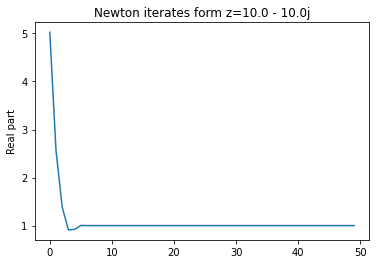

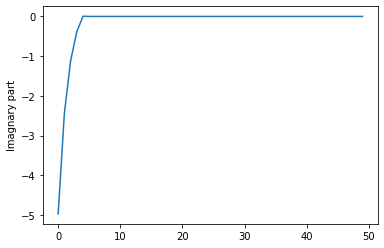

In [ ]:
def f11(z):
  return z**2 - 1

def df11(z):
  return 2*z

z=10.0 - 10.0j
r=[]
i=[]
for k in range(50):
  dz = df11(z)
  z = z - f11(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=10.0 - 10.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imagnary part')
plt.show()

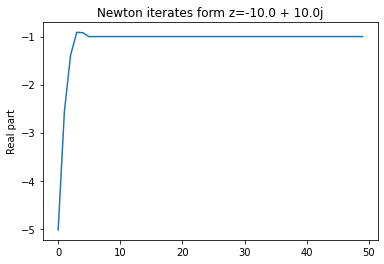

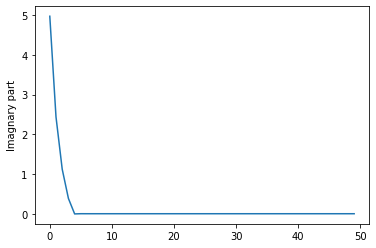

In [ ]:
def f11(z):
  return z**2 - 1

def df11(z):
  return 2*z

z=-10.0 + 10.0j
r=[]
i=[]
for k in range(50):
  dz = df11(z)
  z = z - f11(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=-10.0 + 10.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imagnary part')
plt.show()

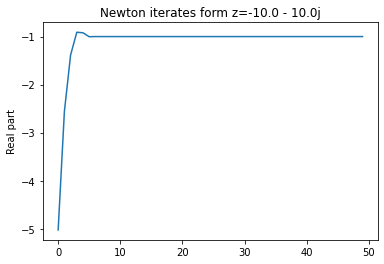

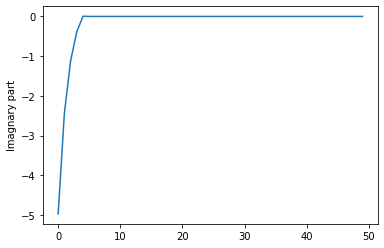

In [ ]:
def f11(z):
  return z**2 - 1

def df11(z):
  return 2*z

z=-10.0 - 10.0j
r=[]
i=[]
for k in range(50):
  dz = df11(z)
  z = z - f11(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=-10.0 - 10.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imagnary part')
plt.show()

In [ ]:
def f11(z):
  return z**2 - 1

def df11(z):
  return 2*z

z=0.0 + 0.0j
r=[]
i=[]
for k in range(50):
  dz = df11(z)
  z = z - f11(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=0.0 + 0.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imagnary part')
plt.show()

ZeroDivisionError: ignored

Interpretation: The inputs converge to the dominant root of their side, except 0+0j, which generates conflict as it is the origin of the plane.

### **z^2+ 1**

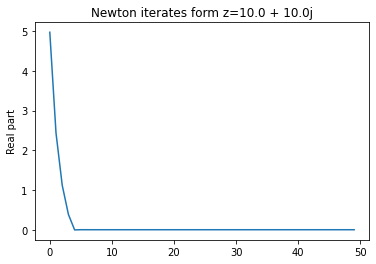

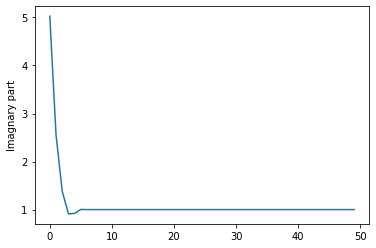

In [ ]:
def f12(z):
  return z**2 + 1

def df12(z):
  return 2*z

z=10.0 + 10.0j
r=[]
i=[]
for k in range(50):
  dz = df12(z)
  z = z - f12(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=10.0 + 10.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imagnary part')
plt.show()

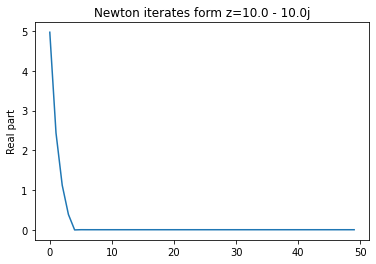

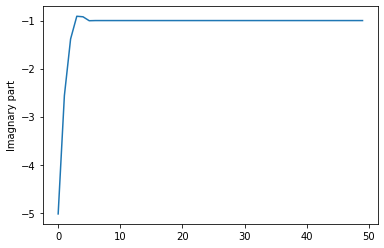

In [ ]:
def f12(z):
  return z**2 + 1

def df12(z):
  return 2*z

z=10.0 - 10.0j
r=[]
i=[]
for k in range(50):
  dz = df12(z)
  z = z - f12(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=10.0 - 10.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imagnary part')
plt.show()

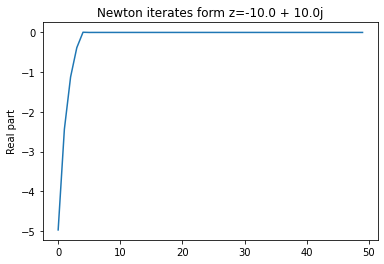

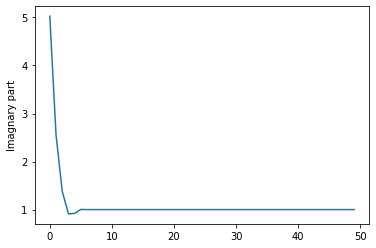

In [ ]:
def f12(z):
  return z**2 + 1

def df12(z):
  return 2*z

z=-10.0 + 10.0j
r=[]
i=[]
for k in range(50):
  dz = df12(z)
  z = z - f12(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=-10.0 + 10.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imagnary part')
plt.show()

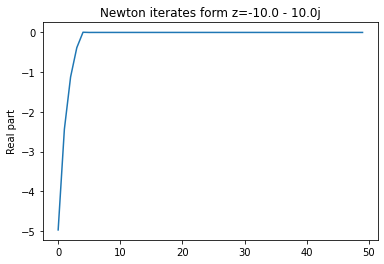

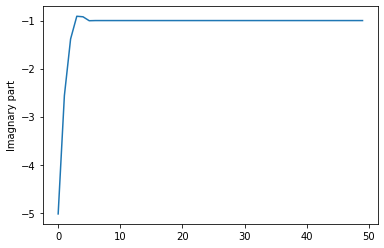

In [ ]:
def f12(z):
  return z**2 + 1

def df12(z):
  return 2*z

z=-10.0 - 10.0j
r=[]
i=[]
for k in range(50):
  dz = df12(z)
  z = z - f12(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=-10.0 - 10.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imagnary part')
plt.show()

In [ ]:
def f12(z):
  return z**2 + 1

def df12(z):
  return 2*z

z=0.0 + 0.0j
r=[]
i=[]
for k in range(50):
  dz = df12(z)
  z = z - f12(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=10.0 + 10.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imagnary part')
plt.show()

ZeroDivisionError: ignored

Intepretation: The inputs converge to the dominant root of their side, except 0+0j, which generates conflict as it is the origin of the plane.